In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mplhep as hep 
import uproot
from scipy.stats import bootstrap

plt.style.use(hep.style.CMS)

In [5]:
file_names=['Na22_nearest.root']
uproot.open(file_names[0])['SiPM'].keys()

['EventID', 'Area', '#RealPhoton', '#PE', '#NoisePE', 'Time_Of_Triggering_ns']

Locator attempting to generate 2085 ticks ([-19.400000000000002, ..., 397.40000000000003]), which exceeds Locator.MAXTICKS (1000).


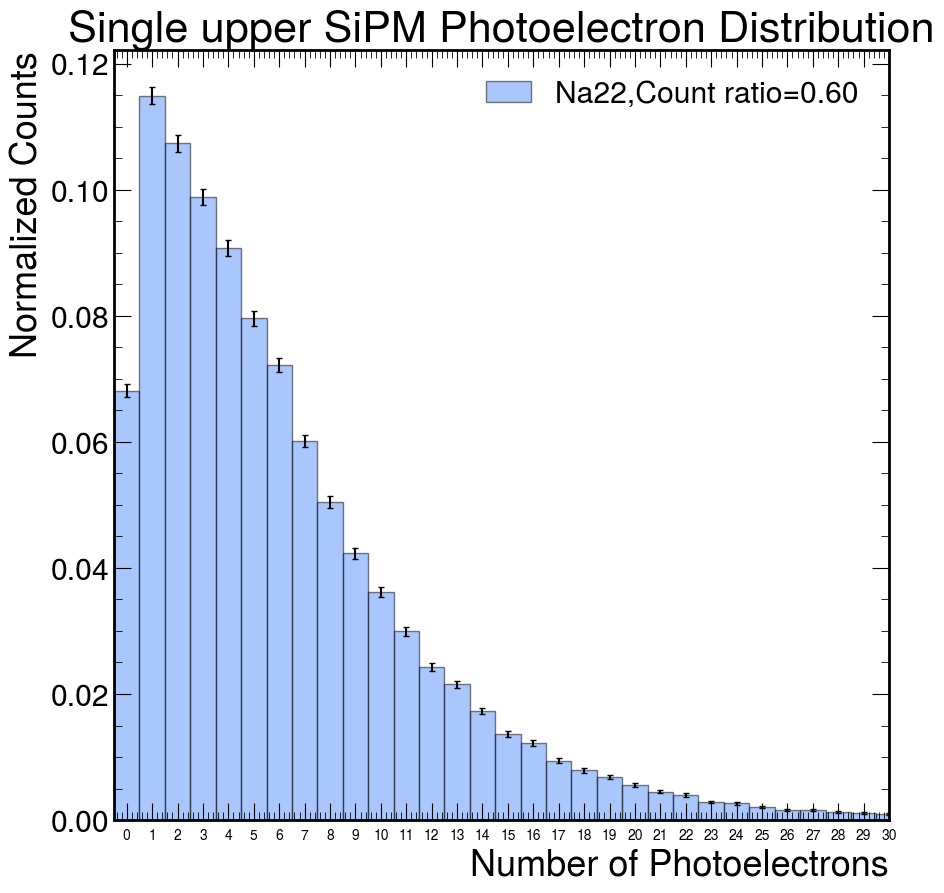

In [8]:
for i in range(len(file_names)):
    data=uproot.open(file_names[i])['SiPM']['#PE'].array()-uproot.open(file_names[i])['SiPM']['#NoisePE'].array()
    n=np.max(data)
    bins = np.arange(start=-0.5, stop=(n+1), step=1)
    # Plot the histogram
    plt.hist(data, bins=bins, density=True,edgecolor='k', alpha=0.5,label=file_names[i].split('_')[0]+",Count ratio=%.2f"%(len(data)/100000))
    # error bars
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Poisson errors
    errors = np.sqrt(counts) / np.sum(counts)
    plt.errorbar(bin_centers, counts/np.sum(counts), yerr=errors, fmt='none', ecolor='k', capsize=2)

m=30
plt.xticks(np.arange(m+1),fontsize=10)
plt.xlabel('Number of Photoelectrons')
plt.ylabel('Normalized Counts')
plt.title('Single upper SiPM Photoelectron Distribution')
plt.xlim(-0.5,m)
plt.legend()

# Resolutions

In [4]:
file_names=[]
E_list=[]
for i in np.arange(100,700,100):
    file_names.append("Calibration/Energy_%s.root"%(i))
    E_list.append(int(i))
uproot.open(file_names[0])['SiPM'].keys()

FileNotFoundError: [Errno 2] No such file or directory: '/home/eltisau/Documents/Positronium_Experiment/Simulation_SecondVersion/Geant4_Flexible/Geant4/e001_dataset/NoNoise/2channel/Calibration/Energy_100.root'

In [ ]:
# Energy resolution
# Real photon vs PE
RPC=[]
PEC=[]
AreaC=[]
for i in range(len(file_names)):
    Energy_label=E_list[i]
    data=uproot.open(file_names[i])['SiPM']
    RealPhotonCount=data["#RealPhoton"].array().to_numpy()
    PhotoelectricCount=data["#PE"].array().to_numpy()
    AreaCount=data["Area"].array().to_numpy()
    RPC.append([Energy_label,RealPhotonCount.mean(), RealPhotonCount.std()])
    PEC.append([Energy_label,PhotoelectricCount.mean(), PhotoelectricCount.std()])
    AreaC.append([Energy_label,AreaCount.mean(), AreaCount.std()])
RPC=np.array(RPC)
PEC=np.array(PEC)
AreaC=np.array(AreaC)

In [ ]:
mydat=[]
rngs = np.random.default_rng(234893458942534)
Re = lambda x, axis: np.std(x, axis=axis, ddof=1) / np.mean(x, axis=axis)
for i in range(len(file_names)):
    Energy_label=E_list[i]
    data=uproot.open(file_names[i])['SiPM']
    RealPhotonCount=data["#RealPhoton"].array().to_numpy()
    bootstrap_ci = bootstrap((RealPhotonCount,), Re, confidence_level=0.95,n_resamples=10000,batch=None,method='basic', random_state=rngs,vectorized=True)
    ci_low, ci_high = bootstrap_ci.confidence_interval
    mean_value = bootstrap_ci.bootstrap_distribution.mean()
    mydat.append([Energy_label,mean_value,np.abs(mean_value-ci_low),np.abs(mean_value-ci_high)])
mydat.sort(key=lambda x: x[0])
mydat=np.array(mydat)
X_label_Photon=mydat[:,0]
Y_label_Photon=mydat[:,1]
Y_err_Photon=[mydat[:,2],mydat[:,3]]
mydat=[]
rngs = np.random.default_rng(234893458942534)
Re = lambda x, axis: np.std(x, axis=axis, ddof=1) / np.mean(x, axis=axis)
for i in range(len(file_names)):
    Energy_label=E_list[i]
    data=uproot.open(file_names[i])['SiPM']
    PhotoelectricCount=data["#PE"].array().to_numpy()
    bootstrap_ci = bootstrap((PhotoelectricCount,), Re, confidence_level=0.95,n_resamples=10000,batch=None,method='basic', random_state=rngs,vectorized=True)
    ci_low, ci_high = bootstrap_ci.confidence_interval
    mean_value = bootstrap_ci.bootstrap_distribution.mean()
    mydat.append([Energy_label,mean_value,np.abs(mean_value-ci_low),np.abs(mean_value-ci_high)])
mydat.sort(key=lambda x: x[0])
mydat=np.array(mydat)
X_label_PE=mydat[:,0]
Y_label_PE=mydat[:,1]
Y_err_PE=[mydat[:,2],mydat[:,3]]
mydat=[]
rngs = np.random.default_rng(234893458942534)
Re = lambda x, axis: np.std(x, axis=axis, ddof=1) / np.mean(x, axis=axis)
for i in range(len(file_names)):
    Energy_label=E_list[i]
    data=uproot.open(file_names[i])['SiPM']
    AreaCount=data["Area"].array().to_numpy()
    bootstrap_ci = bootstrap((AreaCount,), Re, confidence_level=0.95,n_resamples=10000,batch=None,method='basic', random_state=rngs,vectorized=True)
    ci_low, ci_high = bootstrap_ci.confidence_interval
    mean_value = bootstrap_ci.bootstrap_distribution.mean()
    mydat.append([Energy_label,mean_value,np.abs(mean_value-ci_low),np.abs(mean_value-ci_high)])
mydat.sort(key=lambda x: x[0])
mydat=np.array(mydat)
X_label_Area=mydat[:,0]
Y_label_Area=mydat[:,1]
Y_err_Area=[mydat[:,2],mydat[:,3]]

/tmp/ipykernel_490472/2726055573.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(X_label_PE, Y_label_PE, yerr=Y_err_PE, label='Photoelectric Count', marker='o',fmt='o', capsize=3)


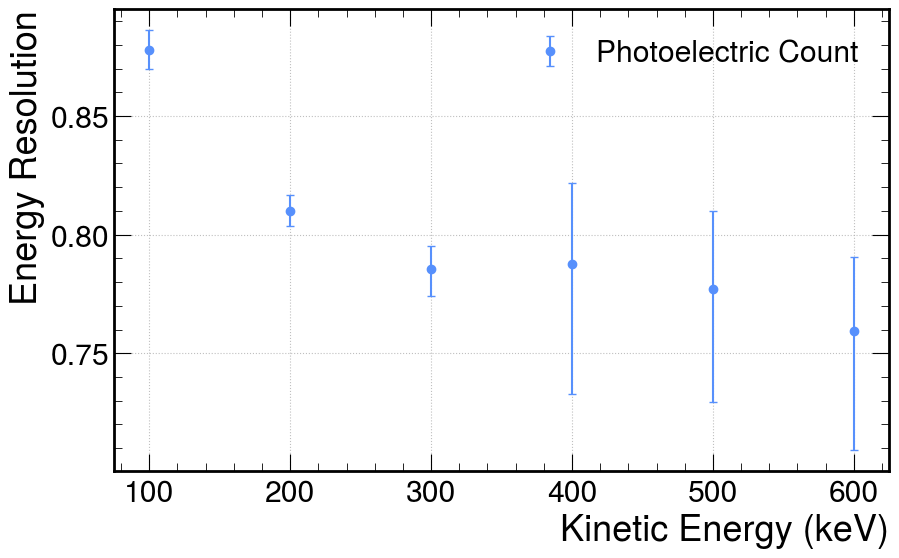

In [ ]:
plt.figure(figsize=(10, 6))
#plt.errorbar(X_label_Photon, Y_label_Photon, yerr=Y_err_Photon, label='Real Photon Count', marker='o',fmt='o', capsize=3)
plt.errorbar(X_label_PE, Y_label_PE, yerr=Y_err_PE, label='Photoelectric Count', marker='o',fmt='o', capsize=3)
#plt.errorbar(X_label_Area, Y_label_Area, yerr=Y_err_Area, label='Area Count', marker='o',fmt='o', capsize=3)
plt.xlabel('Kinetic Energy (keV)')
plt.ylabel('Energy Resolution')
plt.legend()
plt.grid()
plt.show()

# Some Linearity

In [ ]:
# Energy resolution
# Real photon vs PE
RPC=[]
PEC=[]
AreaC=[]
for i in range(len(file_names)):
    Energy_label=E_list[i]
    data=uproot.open(file_names[i])['SiPM']
    RealPhotonCount=data["#RealPhoton"].array().to_numpy()
    PhotoelectricCount=data["#PE"].array().to_numpy()
    AreaCount=data["Area"].array().to_numpy()
    RPC.append([Energy_label,RealPhotonCount.mean(), RealPhotonCount.std()])
    PEC.append([Energy_label,PhotoelectricCount.mean(), PhotoelectricCount.std()])
    AreaC.append([Energy_label,AreaCount.mean(), AreaCount.std()])
RPC=np.array(RPC)
PEC=np.array(PEC)
AreaC=np.array(AreaC)

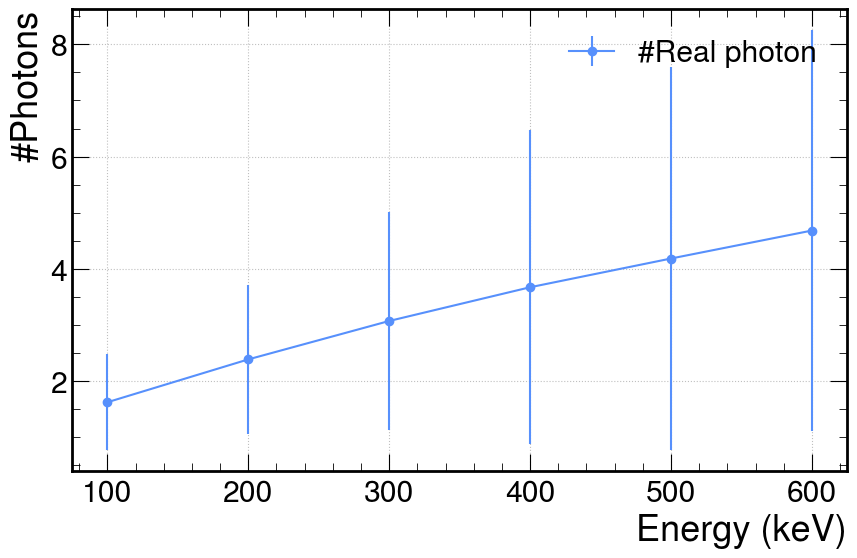

In [ ]:
# Real photon vs PE
EnergyResolutionRPC = RPC[:, 1]
EnergyResolutionRPC_err = RPC[:, 2]
EnergyResolutionPEC = PEC[:, 1]
EnergyResolutionPEC_err = PEC[:, 2]
EnergyResolutionAreaC = AreaC[:, 1]
EnergyResolutionAreaC_err = AreaC[:, 2]
# Plotting the energy resolutions
plt.figure(figsize=(10, 6))
plt.errorbar(RPC[:, 0], EnergyResolutionRPC,yerr=EnergyResolutionRPC_err, label='#Real photon', marker='o')
#plt.errorbar(EnergyResolutionRPC, EnergyResolutionAreaC, xerr=EnergyResolutionRPC_err, yerr=EnergyResolutionAreaC_err,label='#Photon vs #Area', marker='o')
plt.xlabel("Energy (keV)")
plt.ylabel("#Photons")
plt.legend()
plt.grid()

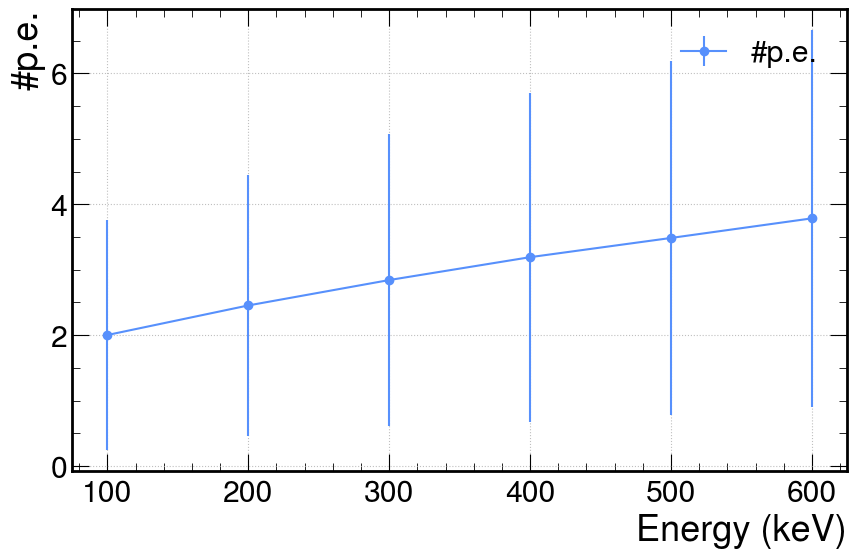

In [ ]:
# Real photon vs PE
EnergyResolutionRPC = RPC[:, 1]
EnergyResolutionRPC_err = RPC[:, 2]
EnergyResolutionPEC = PEC[:, 1]
EnergyResolutionPEC_err = PEC[:, 2]
EnergyResolutionAreaC = AreaC[:, 1]
EnergyResolutionAreaC_err = AreaC[:, 2]
# Plotting the energy resolutions
plt.figure(figsize=(10, 6))
plt.errorbar(RPC[:, 0], EnergyResolutionPEC,yerr=EnergyResolutionPEC_err, label='#p.e.', marker='o')
#plt.errorbar(EnergyResolutionRPC, EnergyResolutionAreaC, xerr=EnergyResolutionRPC_err, yerr=EnergyResolutionAreaC_err,label='#Photon vs #Area', marker='o')
plt.xlabel("Energy (keV)")
plt.ylabel("#p.e.")
plt.legend()
plt.grid()

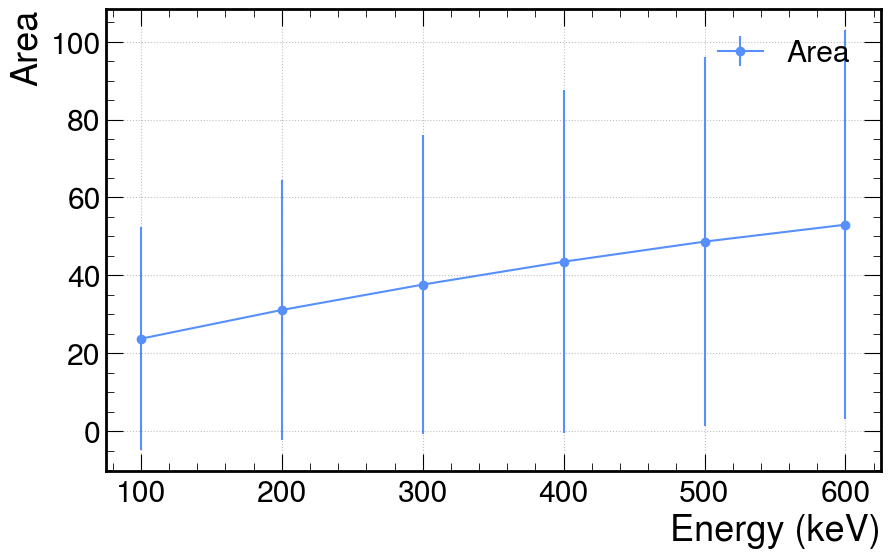

In [ ]:
# Real photon vs PE
EnergyResolutionRPC = RPC[:, 1]
EnergyResolutionRPC_err = RPC[:, 2]
EnergyResolutionPEC = PEC[:, 1]
EnergyResolutionPEC_err = PEC[:, 2]
EnergyResolutionAreaC = AreaC[:, 1]
EnergyResolutionAreaC_err = AreaC[:, 2]
# Plotting the energy resolutions
plt.figure(figsize=(10, 6))
plt.errorbar(RPC[:, 0], EnergyResolutionAreaC,yerr=EnergyResolutionAreaC_err, label='Area', marker='o')
#plt.errorbar(EnergyResolutionRPC, EnergyResolutionAreaC, xerr=EnergyResolutionRPC_err, yerr=EnergyResolutionAreaC_err,label='#Photon vs #Area', marker='o')
plt.xlabel("Energy (keV)")
plt.ylabel("Area")
plt.legend()
plt.grid()

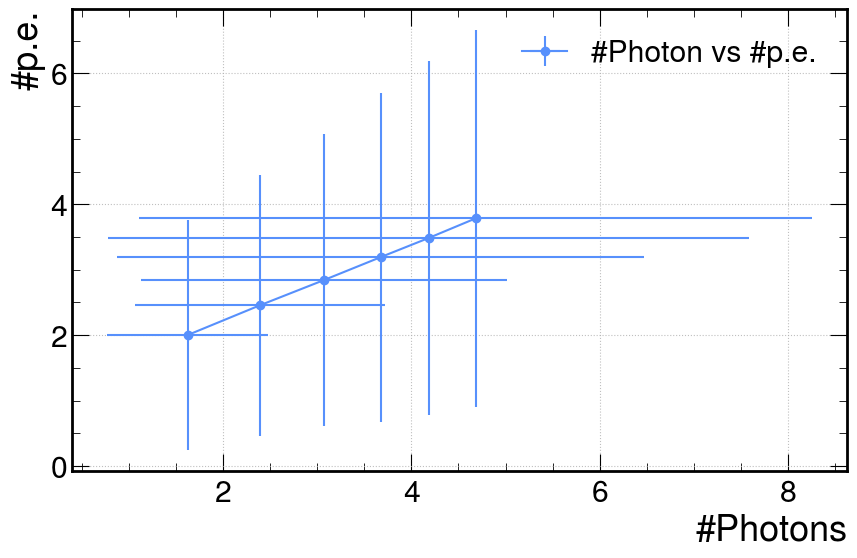

In [ ]:
# Real photon vs PE
EnergyResolutionRPC = RPC[:, 1]
EnergyResolutionRPC_err = RPC[:, 2]
EnergyResolutionPEC = PEC[:, 1]
EnergyResolutionPEC_err = PEC[:, 2]
EnergyResolutionAreaC = AreaC[:, 1]
EnergyResolutionAreaC_err = AreaC[:, 2]
# Plotting the energy resolutions
plt.figure(figsize=(10, 6))
plt.errorbar(EnergyResolutionRPC, EnergyResolutionPEC, xerr=EnergyResolutionRPC_err,yerr=EnergyResolutionPEC_err, label='#Photon vs #p.e.', marker='o')
#plt.errorbar(EnergyResolutionRPC, EnergyResolutionAreaC, xerr=EnergyResolutionRPC_err, yerr=EnergyResolutionAreaC_err,label='#Photon vs #Area', marker='o')
plt.xlabel("#Photons")
plt.ylabel("#p.e.")
plt.legend()
plt.grid()

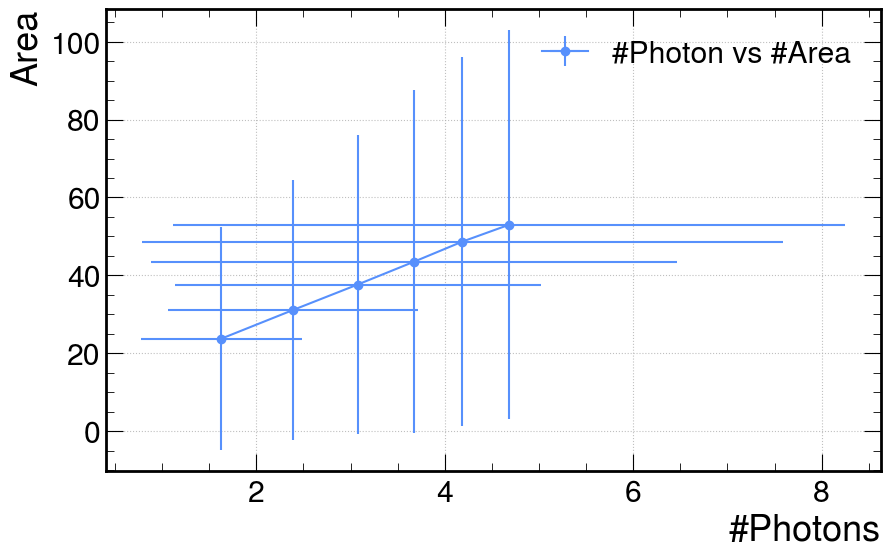

In [ ]:
# Real photon vs PE
EnergyResolutionRPC = RPC[:, 1]
EnergyResolutionRPC_err = RPC[:, 2]
EnergyResolutionPEC = PEC[:, 1]
EnergyResolutionPEC_err = PEC[:, 2]
EnergyResolutionAreaC = AreaC[:, 1]
EnergyResolutionAreaC_err = AreaC[:, 2]
# Plotting the energy resolutions
plt.figure(figsize=(10, 6))
#plt.errorbar(EnergyResolutionRPC, EnergyResolutionPEC, xerr=EnergyResolutionRPC_err,yerr=EnergyResolutionPEC_err, label='#Photon vs #p.e.', marker='o')
plt.errorbar(EnergyResolutionRPC, EnergyResolutionAreaC, xerr=EnergyResolutionRPC_err, yerr=EnergyResolutionAreaC_err,label='#Photon vs #Area', marker='o')
plt.xlabel("#Photons")
plt.ylabel("Area")
plt.legend()
plt.grid()

# Combined plot

In [ ]:
RPC=[]
PEC=[]
AreaC=[]
for i in file_names:
    data=uproot.open(i)['SiPM']
    RPC.append(data["#RealPhoton"].array().to_numpy())
    PEC.append(data["#PE"].array().to_numpy())
    AreaC.append(data["Area"].array().to_numpy())


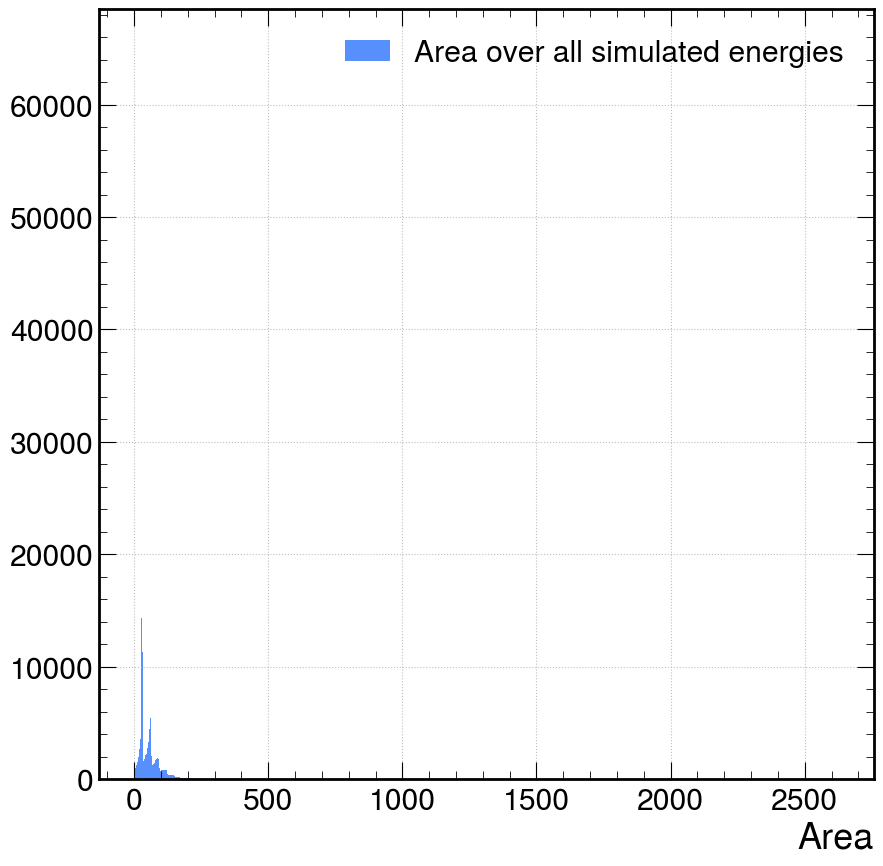

In [ ]:
#plt.hist(np.concat(RPC),bins="auto")
#plt.hist(np.concat(PEC),bins="auto",label="#p.e. over all simulated energies")
plt.hist(np.concat(AreaC),bins="auto",label="Area over all simulated energies")
plt.xlabel("Area")
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.concat(RPC)

array([1, 1, 1, ..., 3, 2, 7], shape=(238996,), dtype=int32)